# Simulation 

In [1]:
import os
import sys
sys.path.append('..')
from sfp_nsdsyn import simulation as sim
from sfp_nsdsyn import make_dataframes as prep
from sfp_nsdsyn import two_dimensional_model as model
from sfp_nsdsyn import utils as utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
pd.options.mode.chained_assignment = None
%load_ext autoreload
%autoreload 2

In [2]:
subj_list = ['subj01','subj02','subj03','subj04','subj05','subj06','subj07','subj08']

params = pd.read_csv('/Volumes/server/Projects/sfp_nsd/derivatives/sfp_model/results_2D/nsdsyn/summary/precision_weighted_params.csv')
params = params.query('vroinames == "V1"')
params_dict = params.to_dict(orient='records')[0]



In [3]:
scaled_sim = sim.SynthesizeData(roi='V1', n_voxels=100, precision_weight=False,
                       grating_type='scaled', sample_subj_list=subj_list)
stim_info = scaled_sim.get_stim_info_for_n_voxels()
scaled_syn_data = scaled_sim.add_pRF_info(stim_info)
scaled_syn_data = scaled_sim.add_sigma_v(scaled_syn_data)
scaled_syn_data =scaled_sim.synthesize_BOLD_2d(scaled_syn_data, params=params_dict, model=7)
                                                

In [2]:
syn_data = pd.read_csv('~/Projects/debug_sfp_nsd/notebooks/syn_data.csv')

In [4]:
my_dataset = model.SpatialFrequencyDataset(scaled_syn_data, beta_col='normed_betas')
my_model = model.SpatialFrequencyModel(random_state=42)

loss_history, model_history, losses = model.fit_model(my_model, my_dataset,
                                                      save_path=None,
                                                      learning_rate=0.0005, max_epoch=20000,
                                                      print_every=1000, loss_all_voxels=False)

sigma: 0.3745401203632355
random state: 42
**epoch no.0 loss: 0.0532065543
sigma: 0.375
**epoch no.999 loss: 0.0087969902
sigma: 1.016
**epoch no.1999 loss: 0.0021402881
sigma: 1.326
**epoch no.2999 loss: 0.0008235104
sigma: 1.549
**epoch no.3999 loss: 0.0003419727
sigma: 1.726
**epoch no.4999 loss: 0.0001345144
sigma: 1.872
**epoch no.5999 loss: 4.57972e-05
sigma: 1.994
**epoch no.6999 loss: 1.19358e-05
sigma: 2.088
**epoch no.7999 loss: 1.9321e-06
sigma: 2.153
**epoch no.8999 loss: 1.323e-07
sigma: 2.187
**epoch no.9999 loss: 1.9e-09
sigma: 2.198
**epoch no.10999 loss: 0.0
sigma: 2.199
**epoch no.11999 loss: 0.0
sigma: 2.199
**epoch no.12999 loss: 0.0
sigma: 2.199
**epoch no.13999 loss: 0.0
sigma: 2.199
**epoch no.14999 loss: 0.0
sigma: 2.199
**epoch no.15999 loss: 0.0
sigma: 2.199
**epoch no.16999 loss: 0.0
sigma: 2.199
**epoch no.17999 loss: 0.0
sigma: 2.199
**epoch no.18999 loss: 7e-10
sigma: 2.199
**epoch no.19999 loss: 2e-10
sigma: 2.199
*epoch no.20000: Finished! final model pa

In [19]:
# Extract the final epoch parameters from model_history
final_epoch_params = model_history.query('epoch == 19999')
final_epoch_params.drop(columns=['epoch'], inplace=True)
# Extract the parameters from params_dict
params_df = params.query('vroinames == "V1"')
params['type'] = 'ground truth'
final_epoch_params['type'] = 'Simulation'
merged_df = pd.concat([final_epoch_params, params], axis=0)

In [20]:
merged_df

,sigma,slope,intercept,p_1,p_2,p_3,p_4,A_1,A_2,type,Unnamed: 0,vroinames
19999,2.199299,0.150505,0.171402,0.080995,-0.021899,-0.036555,-0.065918,0.057567,-0.019342,Simulation,NaN,NaN
0,2.199299,0.150471,0.171367,0.080991,-0.021897,-0.036557,-0.065930,0.057589,-0.019375,ground truth,0.0,V1


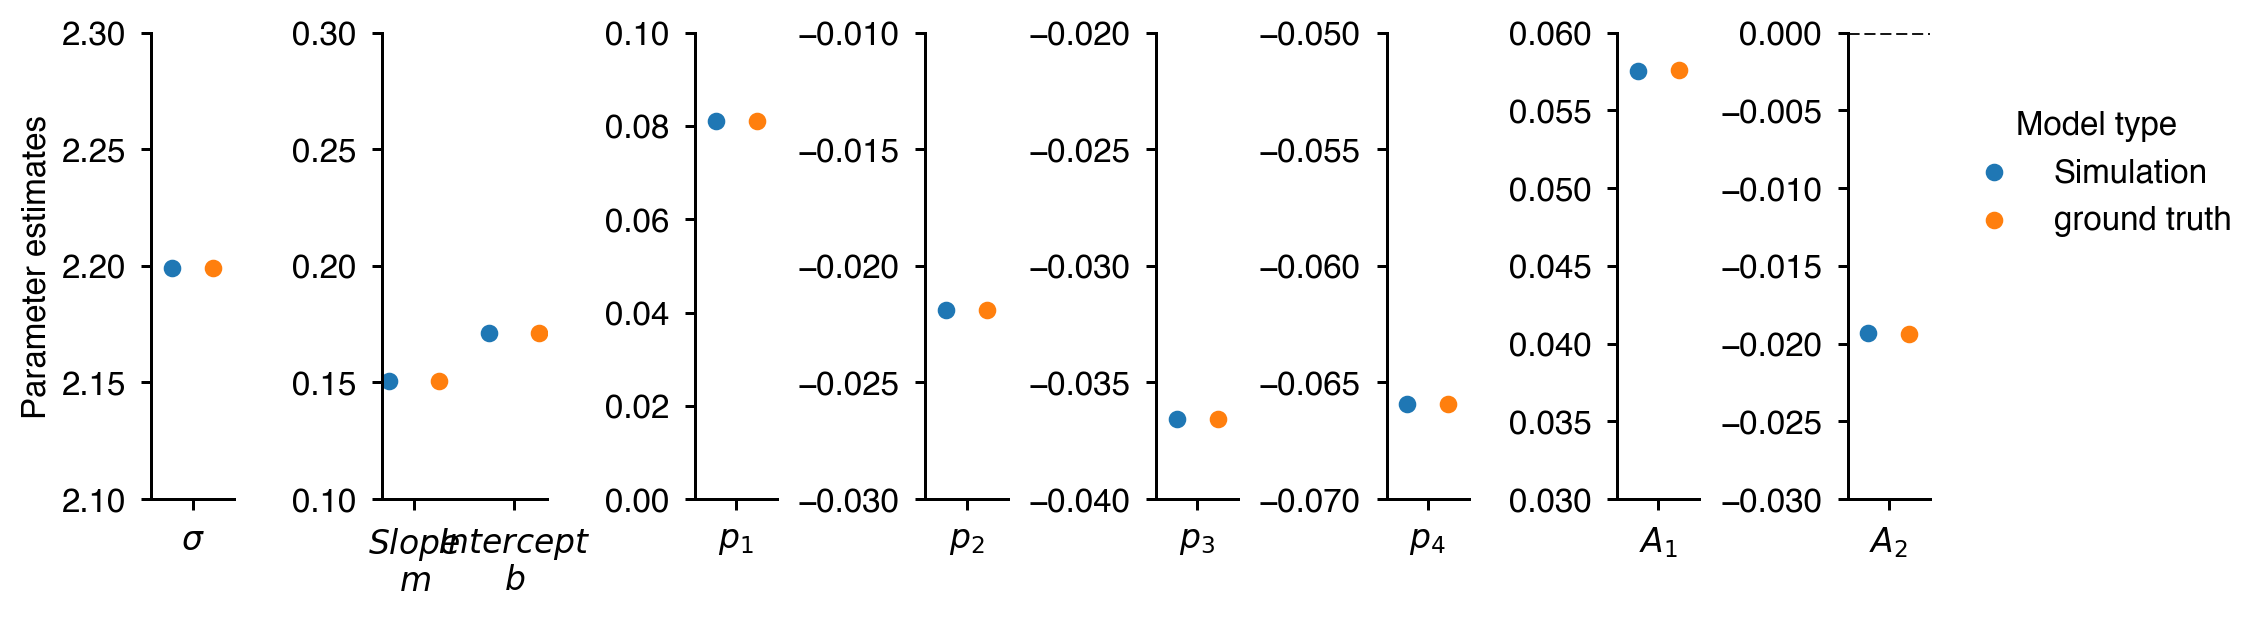

In [35]:
from sfp_nsdsyn.cross_validation_2d_model import plot_model_comparison_params
fig, axes = plt.subplots(1,8, figsize=(10,3), gridspec_kw={'width_ratios': [1,2,1,1,1,1,1,1]})

plot_model_comparison_params(merged_df, fig=fig, axes=axes,
                            params_list = [['sigma'], ['slope', 'intercept'], ['p_1'], ['p_2'], ['p_3'],['p_4'],['A_1'],['A_2']],
                            hue='type',
                            ylim=([2.1, 2.3], 
                                  [0.1, 0.3], 
                                  [0, 0.1],
                                  [-0.03, -0.01], 
                                  [-0.04, -0.02], 
                                  [-0.07, -0.05],
                                  [0.03, 0.06], 
                                  [-0.03, 0]) )

In [53]:
my_dataset = model.SpatialFrequencyDataset(scaled_syn_data, beta_col='normed_betas')
my_model = model.SpatialFrequencyModel(random_state=42)

loss_history, model_history, losses = model.fit_model(my_model, my_dataset,
                                                      save_path=None,
                                                      learning_rate=0.0005, max_epoch=20000,
                                                      print_every=1000, loss_all_voxels=False)

sigma: 0.3745401203632355
random state: 42
**epoch no.0 loss: 0.0503323758
sigma: 0.375
**epoch no.999 loss: 0.0444536188
sigma: 0.408
**epoch no.1999 loss: 0.0126271224
sigma: 1.262
**epoch no.2999 loss: 0.0059186354
sigma: 1.634
**epoch no.3999 loss: 0.0042826688
sigma: 1.901
**epoch no.4999 loss: 0.0035091303
sigma: 2.134
**epoch no.5999 loss: 0.0030576822
sigma: 2.356
**epoch no.6999 loss: 0.0027656962
sigma: 2.577
**epoch no.7999 loss: 0.0025647394
sigma: 2.802
**epoch no.8999 loss: 0.0024214728
sigma: 3.034
**epoch no.9999 loss: 0.0023172169
sigma: 3.274
**epoch no.10999 loss: 0.0022402627
sigma: 3.524
**epoch no.11999 loss: 0.0021828134
sigma: 3.784
**epoch no.12999 loss: 0.0021395044
sigma: 4.055
**epoch no.13999 loss: 0.002106564
sigma: 4.336
**epoch no.14999 loss: 0.0020812971
sigma: 4.627
**epoch no.15999 loss: 0.0020617552
sigma: 4.928
**epoch no.16999 loss: 0.0020465132
sigma: 5.239
**epoch no.17999 loss: 0.0020345138
sigma: 5.56
**epoch no.18999 loss: 0.0020249368
sigma: 

In [54]:
my_dataset = model.SpatialFrequencyDataset(syn_data, beta_col='normed_betas')
my_model = model.SpatialFrequencyModel(random_state=42)

loss_history, model_history, losses = model.fit_model(my_model, my_dataset,
                                                      save_path=None,
                                                      learning_rate=0.0005, max_epoch=20000,
                                                      print_every=1000, loss_all_voxels=False)

sigma: 0.3745401203632355
random state: 42
**epoch no.0 loss: 0.0527364869
sigma: 0.375
**epoch no.999 loss: 0.0090394407
sigma: 1.028
**epoch no.1999 loss: 0.0020014323
sigma: 1.342
**epoch no.2999 loss: 0.0007705731
sigma: 1.562
**epoch no.3999 loss: 0.0003186035
sigma: 1.738
**epoch no.4999 loss: 0.0001239535
sigma: 1.883
**epoch no.5999 loss: 4.14198e-05
sigma: 2.002
**epoch no.6999 loss: 1.04573e-05
sigma: 2.095
**epoch no.7999 loss: 1.6008e-06
sigma: 2.157
**epoch no.8999 loss: 9.91e-08
sigma: 2.189
**epoch no.9999 loss: 1.2e-09
sigma: 2.198
**epoch no.10999 loss: 0.0
sigma: 2.199
**epoch no.11999 loss: 0.0
sigma: 2.199
**epoch no.12999 loss: 0.0
sigma: 2.199
**epoch no.13999 loss: 0.0
sigma: 2.199
**epoch no.14999 loss: 0.0
sigma: 2.199
**epoch no.15999 loss: 0.0
sigma: 2.199
**epoch no.16999 loss: 0.0
sigma: 2.199
**epoch no.17999 loss: 0.0
sigma: 2.199
**epoch no.18999 loss: 0.0
sigma: 2.199
**epoch no.19999 loss: 0.0
sigma: 2.199
*epoch no.20000: Finished! final model params.

In [ ]:
for sub in subj_list:
    sub_data = pd.read_csv('/Volumes/server/Projects/sfp_nsd/derivatives/sfp_model/test_results_2Dnsdsyn/model-history_lr-0.0005_eph-30000_sub-subj08_roi-V1_vs-pRFsize.h5')
    sub_data = 
my_dataset = model.SpatialFrequencyDataset(syn_data, beta_col='normed_betas')
my_model = model.SpatialFrequencyModel(random_state=41)
loss_history, model_history, losses = model.fit_model(my_model, my_dataset,
                                                      save_path=None,
                                                      learning_rate=0.0005, max_epoch=5000,
                                                      print_every=5000, loss_all_voxels=False)



['sigma: 0.7509236335754395',
 'slope: 0.046095822006464005',
 'intercept: 0.6768162250518799',
 'p_1: 0.004346948582679033',
 'p_2: 0.011642370373010635',
 'p_3: 0.06038656830787659',
 'p_4: 0.019093066453933716',
 'A_1: 0.6685157418251038',
 'A_2: 0.9174478650093079']

In [ ]:
for sub in subj_list:
    sub_data = pd.read_csv('/Volumes/server/Projects/sfp_nsd/derivatives/dataframes/nsdsyn/model/dset-nsdsyn_sub-{subj}_roi-V1_vs-pRFsize_tavg-False.csv')
    sub_data = 
my_dataset = model.SpatialFrequencyDataset(syn_data, beta_col='normed_betas')
my_model = model.SpatialFrequencyModel(random_state=41)
loss_history, model_history, losses = model.fit_model(my_model, my_dataset,
                                                      save_path=None,
                                                      learning_rate=0.0005, max_epoch=5000,
                                                      print_every=5000, loss_all_voxels=False)




**epoch no.0 loss: 0.032
**epoch no.4999 loss: 0.0
*epoch no.5000: Finished! final model params...
 {'sigma': 1.98, 'slope': 0.16, 'intercept': 0.15, 'p_1': 0.07, 'p_2': -0.02, 'p_3': -0.03, 'p_4': -0.06, 'A_1': 0.06, 'A_2': -0.02}
Elapsed time: 6.55 sec


epoch        2999.000000
sigma           1.710336
slope           0.175799
intercept       0.125189
p_1             0.086905
p_2            -0.021930
p_3            -0.037141
p_4            -0.050894
A_1             0.060305
A_2            -0.022108
Name: 2999, dtype: float64

In [20]:
# Extract the final epoch parameters from model_history
final_epoch_params = model_history.iloc[-1]
final_epoch_params.drop(columns=['epoch'], inplace=True)
# Extract the parameters from params_dict
ground_truth_params = pd.Series(params_dict)
ground_truth_params.drop(columns=['Unnamed: 0', 'vroinames'], inplace=True)

for param in ['sigma', 'slope', 'intercept', 'p_1', 'p_2', 'p_3', 'p_4', 'A_1', 'A_2']:
    final_value = final_epoch_params[param]
    ground_truth_value = ground_truth_params[param]
    difference = final_value - ground_truth_value
    print(f"Parameter: {param}")
    print(f"  Final Epoch Value: {final_value:.3f}, Ground Truth Value: {ground_truth_value:.3f}")
    print(f"  Difference: {difference}\n")



Parameter: sigma
  Final Epoch Value: 1.981, Ground Truth Value: 2.199
  Difference: -0.21801421835423884

Parameter: slope
  Final Epoch Value: 0.162, Ground Truth Value: 0.150
  Difference: 0.011412748250855115

Parameter: intercept
  Final Epoch Value: 0.149, Ground Truth Value: 0.171
  Difference: -0.02195426597166189

Parameter: p_1
  Final Epoch Value: 0.072, Ground Truth Value: 0.081
  Difference: -0.008685795797426538

Parameter: p_2
  Final Epoch Value: -0.022, Ground Truth Value: -0.022
  Difference: -0.0003869287237046916

Parameter: p_3
  Final Epoch Value: -0.033, Ground Truth Value: -0.037
  Difference: 0.0037836087737933635

Parameter: p_4
  Final Epoch Value: -0.059, Ground Truth Value: -0.066
  Difference: 0.007036124502482713

Parameter: A_1
  Final Epoch Value: 0.058, Ground Truth Value: 0.058
  Difference: 9.483876982242095e-05

Parameter: A_2
  Final Epoch Value: -0.021, Ground Truth Value: -0.019
  Difference: -0.0012422779218294738



In [52]:
new_loss = model.normalize_pivotStyle(my_dataset.target)
old_loss = new_loss.flatten()

In [ ]:
old_

In [47]:
old_loss = model.normalize([0,1], 
                test_d, 
                to_group=['voxel'])
print(old_loss)

False
False
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]], dtype=torch.float64)


In [ ]:
new_loss = model.normalize_pivotStyle(my_dataset.target)


torch.Size([100, 28])

In [39]:
import torch
test_d = my_dataset.target[0:2,:]
test_d.shape



torch.Size([2, 28])

In [43]:
print(torch.linalg.norm(test_d, ord=None, dim=1))
print(torch.linalg.norm(test_d, ord=2, dim=1))


tensor([1., 1.])
tensor([1., 1.])


In [26]:
old_loss[0,0]

tensor(4.3080e-317, dtype=torch.float64)

In [27]:
new_loss[0,0]

tensor(0.2216)

In [12]:
model.debug_loss_fn(my_dataset.voxel_info, 
                    my_dataset.sigma_v_info, 
                    my_dataset.prediction, 
                    my_dataset.target, 
                    dataset="nsd")

AttributeError: 'SpatialFrequencyDataset' object has no attribute 'sigma_v_info'

In [ ]:

my_dataset = model.SpatialFrequencyDataset(scaled_syn_data, beta_col='normed_betas')
my_model.print_current_params()

sigma: Parameter containing:
tensor([0.8745], requires_grad=True)
slope: Parameter containing:
tensor([0.9507], requires_grad=True)
intercept: Parameter containing:
tensor([0.7320], requires_grad=True)
p_1: Parameter containing:
tensor([0.0599], requires_grad=True)
p_2: Parameter containing:
tensor([0.0156], requires_grad=True)
p_3: Parameter containing:
tensor([0.0156], requires_grad=True)
p_4: Parameter containing:
tensor([0.0058], requires_grad=True)
A_1: Parameter containing:
tensor([0.8662], requires_grad=True)
A_2: Parameter containing:
tensor([0.6011], requires_grad=True)


In [49]:
lr=0.0005
scaled_sim = sim.SynthesizeData(roi='V1', n_voxels=100, precision_weight=False,
                grating_type='scaled', sample_subj_list=subj_list, random_state=i)
stim_info = scaled_sim.get_stim_info_for_n_voxels()
scaled_syn_data = scaled_sim.add_pRF_info(stim_info)
scaled_syn_data = scaled_sim.add_sigma_v(scaled_syn_data)
scaled_syn_data =scaled_sim.synthesize_BOLD_2d(scaled_syn_data, params=params_dict, model=7)
results_df = pd.DataFrame(columns=['random_state', 'max_epoch', 'sigma', 'slope', 'intercept', 'p_1', 'p_2', 'p_3', 'p_4', 'A_1', 'A_2'])
for max_epoch in [3000, 5000, 10000, 20000, 30000]:
    for i in range(10):
        scaled_syn_data.query('voxel == 0')['eccentricity'].unique()
        my_model = model.SpatialFrequencyModel(random_state=i)
        scaled_loss_history, scaled_model_history, scaled_losses = model.fit_model(my_model, my_dataset,
                                                                                save_path=None,
                                                                                learning_rate=lr, max_epoch=max_epoch,
                                                                                print_every=10000, loss_all_voxels=False)
        # Append the final parameters and random_state to the DataFrame
        final_epoch_params = scaled_model_history.query('epoch == @max_epoch-1')
        final_epoch_params['random_state'] = [i] * len(final_epoch_params)
        results_df = pd.concat([results_df, final_epoch_params], ignore_index=True)

# Add the ground truth parameters to the results_df with random_state as None
results_df = results_df.append({
    'random_state': 'Ground Truth',
    'sigma': params_dict['sigma'],
    'slope': params_dict['slope'],
    'intercept': params_dict['intercept'],
    'p_1': params_dict['p_1'],
    'p_2': params_dict['p_2'],
    'p_3': params_dict['p_3'],
    'p_4': params_dict['p_4'],
    'A_1': params_dict['A_1'],
    'A_2': params_dict['A_2']
}, ignore_index=True)


**epoch no.0 loss: 0.043
*epoch no.3000: Finished! final model params...
 {'sigma': 2.09, 'slope': 0.27, 'intercept': -0.03, 'p_1': 0.13, 'p_2': 0.06, 'p_3': -0.04, 'p_4': -0.03, 'A_1': -0.19, 'A_2': -0.1}
Elapsed time: 4.05 sec
**epoch no.0 loss: 0.031
*epoch no.3000: Finished! final model params...
 {'sigma': 1.94, 'slope': 0.27, 'intercept': -0.04, 'p_1': 0.01, 'p_2': -0.01, 'p_3': -0.01, 'p_4': -0.02, 'A_1': -0.23, 'A_2': -0.11}
Elapsed time: 4.41 sec
**epoch no.0 loss: 0.028
*epoch no.3000: Finished! final model params...
 {'sigma': 1.98, 'slope': 0.26, 'intercept': -0.03, 'p_1': 0.02, 'p_2': -0.01, 'p_3': -0.01, 'p_4': -0.02, 'A_1': -0.22, 'A_2': -0.11}
Elapsed time: 4.11 sec
**epoch no.0 loss: 0.027
*epoch no.3000: Finished! final model params...
 {'sigma': 2.02, 'slope': 0.27, 'intercept': -0.03, 'p_1': 0.02, 'p_2': -0.0, 'p_3': -0.02, 'p_4': -0.02, 'A_1': -0.23, 'A_2': -0.11}
Elapsed time: 4.32 sec
**epoch no.0 loss: 0.022
*epoch no.3000: Finished! final model params...
 {'sig

<AxesSubplot:>

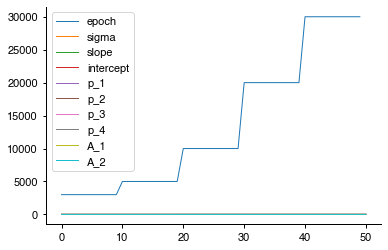

In [ ]:
results_df = results_df[['epoch','random_state','sigma','slope','intercept','p_1','p_2','p_3','p_4','A_1','A_2']]

In [79]:
results_df.replace(np.nan, 'Ground Truth', inplace=True)

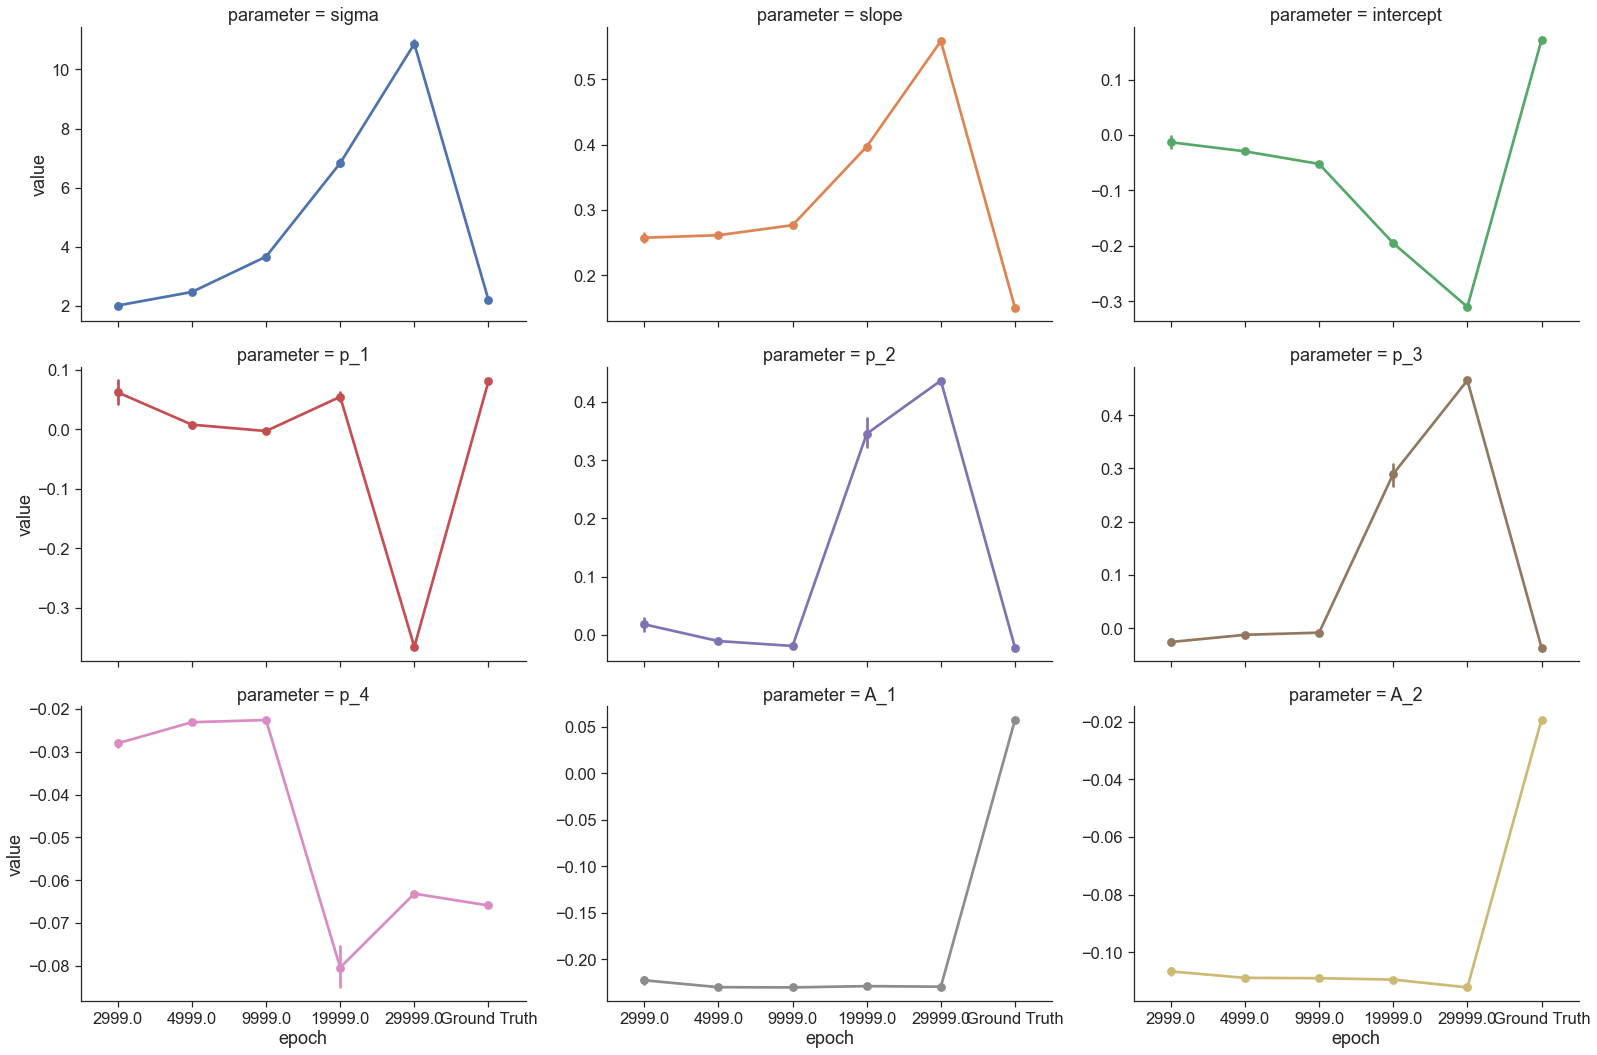

In [80]:
sns.set_theme(context='notebook', style='ticks', font_scale=1.5)
results_long_df = results_df.melt(id_vars=['random_state','epoch'], var_name='parameter', value_name='value')

# Plot ground truth as a dotted line
sns.catplot(data=results_long_df, x='epoch', y='value', kind='point', errorbar=('ci', 68),
            hue='parameter', col='parameter', col_wrap=3, aspect=1.5, sharey=False)


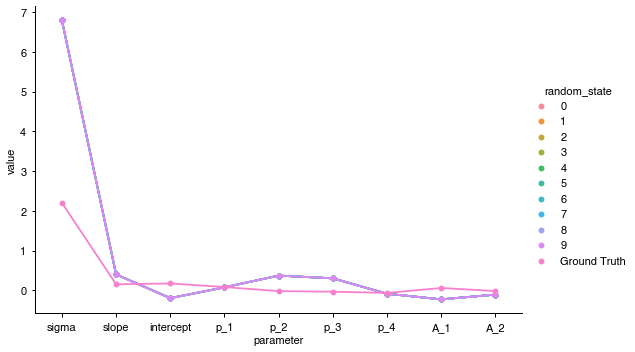

In [48]:
results_long_df = results_df.melt(id_vars=['random_state','epoch'], var_name='parameter', value_name='value')
sns.catplot(data=results_long_df, x='parameter', y='value', kind='point', hue='random_state',  aspect=1.5)

In [44]:
results_df

,random_state,sigma,slope,intercept,p_1,p_2,p_3,p_4,A_1,A_2,epoch
0,0,7.020287,0.404178,-0.203017,0.056416,0.390520,0.324960,-0.089682,-0.228649,-0.110044,19999.0
1,1,6.735533,0.397198,-0.196716,0.076382,0.362886,0.293639,-0.085864,-0.228486,-0.109177,19999.0
2,2,6.801514,0.399006,-0.198354,0.072687,0.370734,0.301594,-0.087097,-0.228517,-0.109414,19999.0
3,3,6.871297,0.400711,-0.199928,0.068271,0.377922,0.309352,-0.088197,-0.228554,-0.109609,19999.0
4,4,7.327732,0.410783,-0.208397,0.016591,0.409827,0.356681,-0.090222,-0.228906,-0.110921,19999.0
5,5,6.517971,0.390204,-0.190137,0.084044,0.324664,0.260377,-0.078671,-0.228433,-0.108494,19999.0
6,6,7.379733,0.411987,-0.209229,0.005541,0.412870,0.362798,-0.089947,-0.228963,-0.111085,19999.0
7,7,6.333432,0.380564,-0.180422,0.078023,0.254896,0.209629,-0.063456,-0.228590,-0.107841,19999.0
8,8,7.169208,0.407393,-0.205763,0.041160,0.400552,0.339728,-0.090402,-0.228757,-0.110461,19999.0
9,9,6.158594,0.365086,-0.162576,0.048803,0.147240,0.136645,-0.040761,-0.229096,-0.107904,19999.0


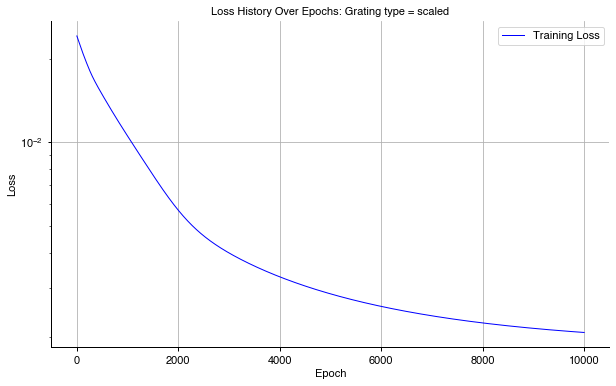

In [39]:
# Plot the loss history
plt.figure(figsize=(10, 6))
plt.plot(scaled_loss_history['epoch'], scaled_loss_history['loss'], label='Training Loss', color='b')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss History Over Epochs: Grating type = scaled')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.show()


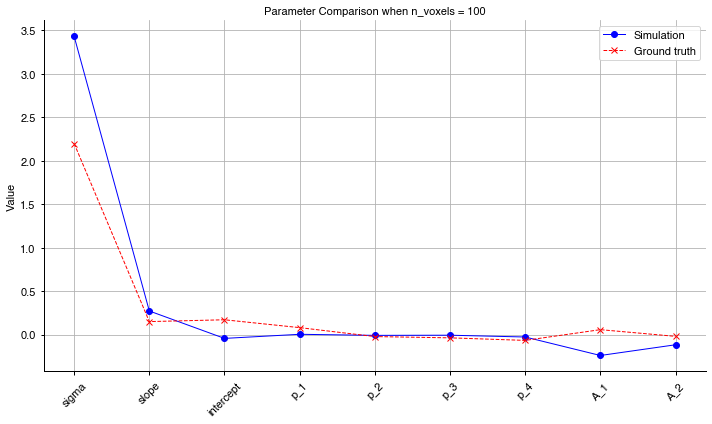

In [41]:
# Extract the parameters from model_history for epoch 9999
epoch_9999_params = scaled_model_history.query('epoch == 10000-1').iloc[0]

# Extract the parameters from params_dict
params_dict_values = [params_dict[key] for key in ['sigma', 'slope', 'intercept', 'p_1', 'p_2', 'p_3', 'p_4', 'A_1', 'A_2']]

# Plot all parameters in one axis
params = ['sigma', 'slope', 'intercept', 'p_1', 'p_2', 'p_3', 'p_4', 'A_1', 'A_2']
fig, ax = plt.subplots(figsize=(10, 6))

# Plot simulation parameters
ax.plot(params, [epoch_9999_params[i+1] for i in range(len(params))], label='Simulation', marker='o', color='blue', linestyle='-')

# Plot ground truth parameters
ax.plot(params, params_dict_values, label='Ground truth', marker='x', color='red', linestyle='--')

ax.set_title('Parameter Comparison when n_voxels = 100')
ax.set_ylabel('Value')
ax.legend()
ax.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

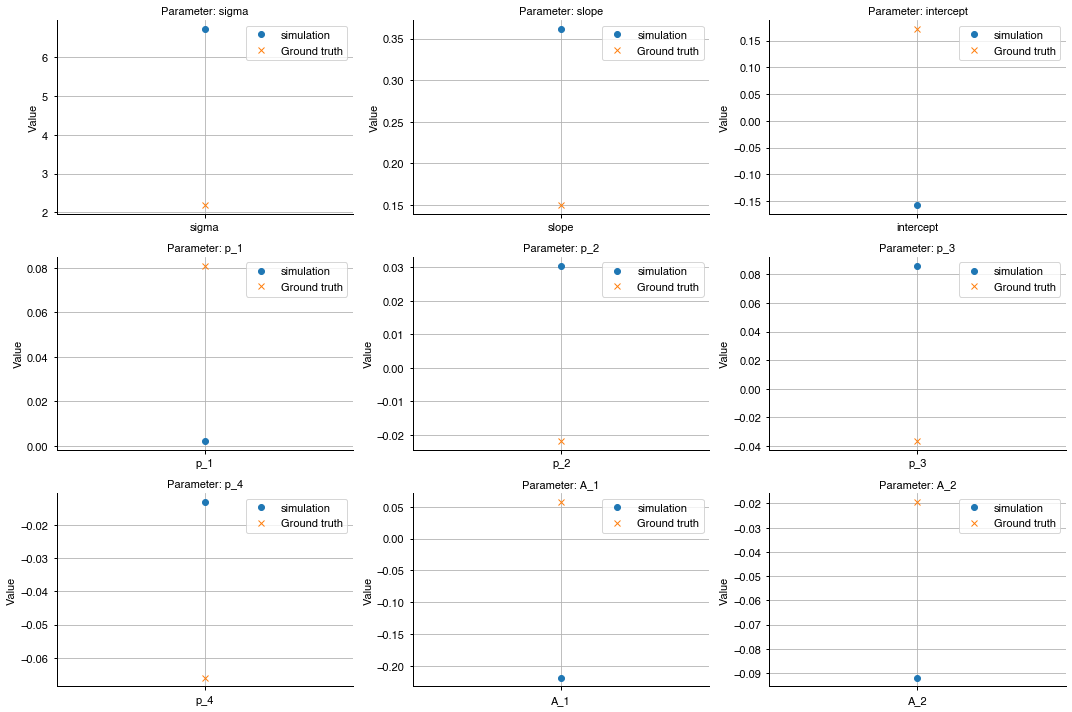

,epoch,sigma,slope,intercept,p_1,p_2,p_3,p_4,A_1,A_2
9999,9999,3.623088,0.27392,-0.05036,-0.005288,-0.009753,-0.002091,-0.024264,-0.218531,-0.092105


In [ ]:
# Extract the parameters from model_history for epoch 9999
epoch_9999_params = model_history.query('epoch == 10000-1').iloc[0]

# Extract the parameters from params_dict
params_dict_values = [params_dict[key] for key in ['sigma', 'slope', 'intercept', 'p_1', 'p_2', 'p_3', 'p_4', 'A_1', 'A_2']]

# Plot each parameter separately in different axes
params = ['sigma', 'slope', 'intercept', 'p_1', 'p_2', 'p_3', 'p_4', 'A_1', 'A_2']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, param in enumerate(params):
    axes[i].plot([param], [epoch_9999_params[i+1]], label='simulation', marker='o', linestyle='None')
    axes[i].plot([param], [params_dict_values[i]], label='Ground truth', marker='x', linestyle='None')
    axes[i].set_title(f'Parameter: {param}')
    axes[i].set_ylabel('Value')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()


In [31]:
constant_sim = sim.SynthesizeData(roi='V1', n_voxels=2500, precision_weight=True,
                       grating_type='constant', sample_subj_list=subj_list)
stim_info = constant_sim.get_stim_info_for_n_voxels()
constant_syn_data = constant_sim.add_pRF_info(stim_info)
constant_syn_data = constant_sim.add_sigma_v(constant_syn_data)
constant_syn_data =constant_sim.synthesize_BOLD_2d(constant_syn_data, params=params_dict, model=7)


In [32]:
my_dataset = model.SpatialFrequencyDataset(constant_syn_data, beta_col='normed_betas')
my_model = model.SpatialFrequencyModel()
pt_path = '/Volumes/server/Projects/sfp_nsd/derivatives/sfp_model/simulation/gratings-constant.pt'
loss_history, model_history, losses = model.fit_model(my_model, my_dataset,
                                                      save_path=pt_path,
                                                      learning_rate=lr, max_epoch=max_epoch,
                                                      print_every=5000, loss_all_voxels=False)

**epoch no.0 loss: 0.044
**epoch no.4999 loss: 0.002
**epoch no.9999 loss: 0.001
**epoch no.14999 loss: 0.001
**epoch no.19999 loss: 0.0
*epoch no.20000: Finished! final model params...
 {'sigma': 5.91, 'slope': 0.0, 'intercept': 0.02, 'p_1': -0.91, 'p_2': -0.64, 'p_3': 0.04, 'p_4': -0.09, 'A_1': -0.16, 'A_2': -0.06}
Elapsed time: 227.16 sec


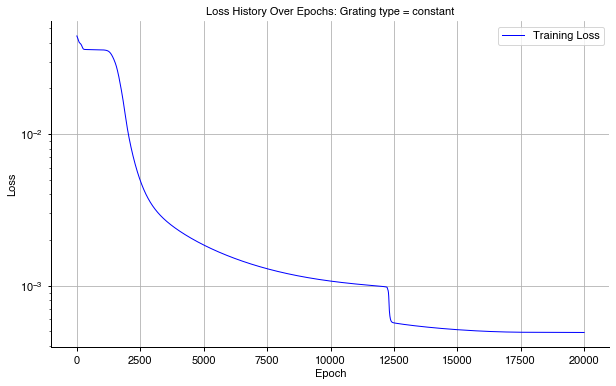

In [33]:
# Plot the loss history
plt.figure(figsize=(10, 6))
plt.plot(loss_history['epoch'], loss_history['loss'], label='Training Loss', color='b')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss History Over Epochs: Grating type = constant')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.show()



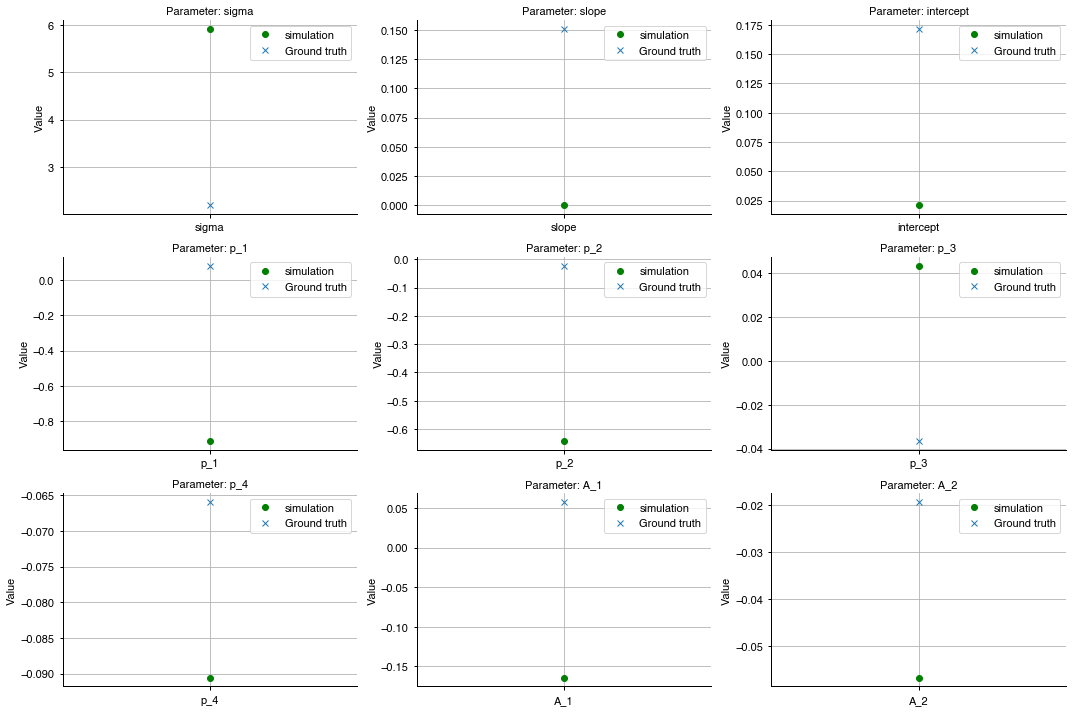

In [35]:
# Extract the parameters from model_history for epoch 9999
epoch_9999_params = model_history.query('epoch == @max_epoch-1').iloc[0]

# Extract the parameters from params_dict
params_dict_values = [params_dict[key] for key in ['sigma', 'slope', 'intercept', 'p_1', 'p_2', 'p_3', 'p_4', 'A_1', 'A_2']]

# Plot each parameter separately in different axes
params = ['sigma', 'slope', 'intercept', 'p_1', 'p_2', 'p_3', 'p_4', 'A_1', 'A_2']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, param in enumerate(params):
    axes[i].plot([param], [epoch_9999_params[i+1]], label='simulation', marker='o', color='green', linestyle='None')
    axes[i].plot([param], [params_dict_values[i]], label='Ground truth', marker='x', linestyle='None')
    axes[i].set_title(f'Parameter: {param}')
    axes[i].set_ylabel('Value')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()
